In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

# Questions


### 🟡Step 1: Read the data (tar.gz file)
As a first step, we unzipped the tar.gz file into a .dat file using 7-zip. 
Then, we convert the .dat file into a string and then into a DataFrame.

#### Method 1 
.strip() --> remove spaces on the sides

.split() --> separate values by spaces (otherwise we'd get a single conlumn)

In [6]:
# Convert .dat file into string (list comprehension)
datContent = [i.strip().split() for i in open("tth_semihad.dat").readlines()]

# Convert string into DataFrame
mydata = pd.DataFrame(datContent)

### 🟡Step 2: Explore the data
**Physics**

"The file was produced from a simulation of pp->tt~H where the top decays hadronically
and the anti-top decays leptonically. I selected events with exactly 1 fat jet with R=1.5."


**Notes**

- The rows represent events. 
- The first column represents the number of constituents. 
- The following columns represent the coordinates of the constituents, η, φ, pT, cycling in that order. (e.g. columns 1, 2, 3 are η, φ, pT for the 1st constituent, columns 4, 5, 6 are η, φ, pT for the 2nd constituent etc.)
- -infinity < η < infinity 
- -π < φ < π
- pT[GeV] > 0



In [7]:
# Display the data
mydata = mydata.rename(columns={0: 'Const'})
display(mydata)

# Print statements
print('There are {} events.'.format(mydata.shape[0]))
print('The maximum number of constituents in an event is {}.'.format((mydata.shape[1] - 1) // 3))

# Display data types
print('\nData Types: \n', mydata.dtypes)

mydata.describe()

,Const,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,4,2.30474,0.221042,78.9436,1.00519,0.736657,61.9115,1.25546,0.748395,48.9755,...,None,None,None,None,None,None,None,None,None,None
1,2,2.35134,-2.18449,176.076,2.46233,-1.50073,47.3355,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,6,0.492933,0.766876,51.5247,-0.984489,2.29985,13.7463,0.103217,1.40088,5.31666,...,None,None,None,None,None,None,None,None,None,None
3,10,-0.624329,0.566723,130.197,-0.602316,0.573666,38.5226,-0.541426,0.449072,15.3244,...,None,None,None,None,None,None,None,None,None,None
4,15,-0.538961,-0.617644,0.819517,0.527734,1.53319,1.94989,0.20174,0.916744,5.63418,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172,9,0.920302,-1.16412,2.7334,1.29659,-0.802425,31.0219,1.43924,-0.331847,41.0458,...,None,None,None,None,None,None,None,None,None,None
12173,20,-3.37552,0.408371,1.10438,-2.20178,-0.384944,9.30608,-2.20033,-0.250145,69.2937,...,None,None,None,None,None,None,None,None,None,None
12174,10,1.39299,-0.378084,121.604,0.58147,-0.162943,6.92172,0.480303,-0.159881,15.9922,...,None,None,None,None,None,None,None,None,None,None
12175,9,1.72606,2.9924,2.48751,1.11057,2.81182,1.12,1.1923,2.66506,148.502,...,None,None,None,None,None,None,None,None,None,None


There are 12177 events.
The maximum number of constituents in an event is 36.

Data Types: 
 Const    object
1        object
2        object
3        object
4        object
          ...  
104      object
105      object
106      object
107      object
108      object
Length: 109, dtype: object


,Const,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
count,12177,12177,12177,12177,12157,12157,12157,12048,12048,12048,...,2,2,2,2,2,2,2,1,1,1
unique,32,12129,12093,12133,12108,12069,12119,11996,11960,11989,...,2,2,2,2,2,2,2,1,1,1
top,9,-1.02194,1.49332,1.48424,-1.08374,1.23109,10.2734,-0.031699,-2.33466,101.799,...,16.1251,-1.6808,-2.79566,431.802,-0.516047,-2.77512,109.598,-0.506679,-0.357684,167.894
freq,1260,2,2,2,3,2,2,2,3,2,...,1,1,1,1,1,1,1,1,1,1


### 🟡Step 3: Construct Average Jet Image

Find local maxima using scipy, sklearn, matplotlib [Link here](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_peak_local_max.html)

**Other Resources**
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
- https://towardsdatascience.com/image-filters-in-python-26ee938e57d2
- https://stackoverflow.com/questions/50747064/how-to-smooth-an-image-with-a-3x3-kernel

In [14]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

#possibly redundant 
from skimage import data, img_as_float

In [15]:
# Fillna with 0
mydata1 = mydata.fillna(0)

# Convert values to floats
mydata1 = mydata1.astype(float)

# Convert df to ndarray
mydata1 = np.asarray(mydata1)

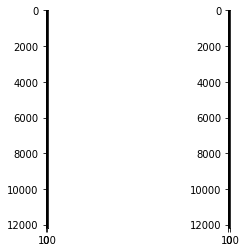

In [24]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
mydata1 = mydata1
result = ndimage.maximum_filter(mydata1, size=0)
ax1.imshow(mydata1)
ax2.imshow(result)
plt.show()

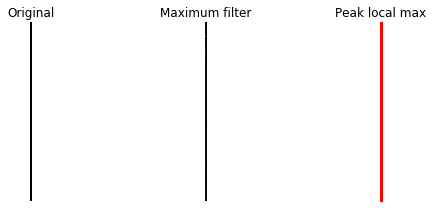

In [13]:
im = mydata1

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndimage.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=20)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

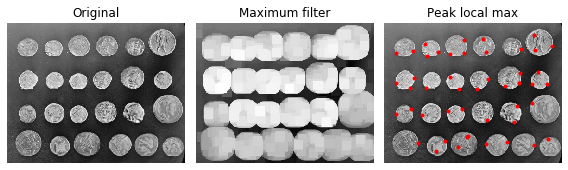

In [15]:
im = img_as_float(data.coins())

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndimage.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=20)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

In [8]:
import pickle
import gzip
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import scipy 

# from sklearn.preprocessing import scale
from sklearn import preprocessing

import h5py

import time

# Source https://github.com/SebastianMacaluso/Deep-learning_jet-images/blob/master/image_preprocess.py

In [9]:
import dask.array as da
f = h5py.File('myfile.hdf5')
x = da.from_array(data, chunks=(1000, 1000))
x - x.mean(axis=1).compute()

da.tensordot(images, w, axes=(0, 0)).compute() / w.sum()

C:\Users\johng\anaconda3\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [4]:
import dask.array as da
f = h5py.File('myfile.hdf5')
x = da.from_array(f['/big-data'], chunks=(1000, 1000))
x - x.mean(axis=1).compute()

da.tensordot(images, w, axes=(0, 0)).compute() / w.sum()

C:\Users\johng\anaconda3\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


KeyError: "Unable to open object (object 'big-data' doesn't exist)"